In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler , StandardScaler

#load dataset
df_game = pd.read_csv("partidos_cebollitas_9eada58c-fb57-4224-a3f5-6d9efc881c2e.csv")
df_game.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [6]:
# appliying normalization
scaler_norm = MinMaxScaler() # transform everything in a scale 0 - 1
df_game['tiros_arco_local_norm'] = scaler_norm.fit_transform(df_game[['tiros_arco_local']])
df_game['tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_game[['tiros_arco_visitante']])

# see results
df_game[['tiros_arco_local','tiros_arco_local_norm']].head() # same process with visitors

,tiros_arco_local,tiros_arco_local_norm
0,12,1.000000
1,12,1.000000
2,10,0.777778
3,3,0.000000
4,7,0.444444


In [19]:
#Standarization
scaler_std = StandardScaler()
df_game['posesion_local_std'] = scaler_std.fit_transform(df_game[['posesion_local (%)']])
df_game['posesion_visitante_std'] = scaler_std.fit_transform(df_game[['posesion_visitante (%)']])

#see results
df_game[['posesion_local (%)','posesion_local_std']]

,posesion_local (%),posesion_local_std
0,54,0.624415
1,60,1.623479
2,55,0.790926
3,57,1.123947
4,52,0.291394
...,...,...
95,52,0.291394
96,56,0.957436
97,58,1.290457
98,58,1.290457


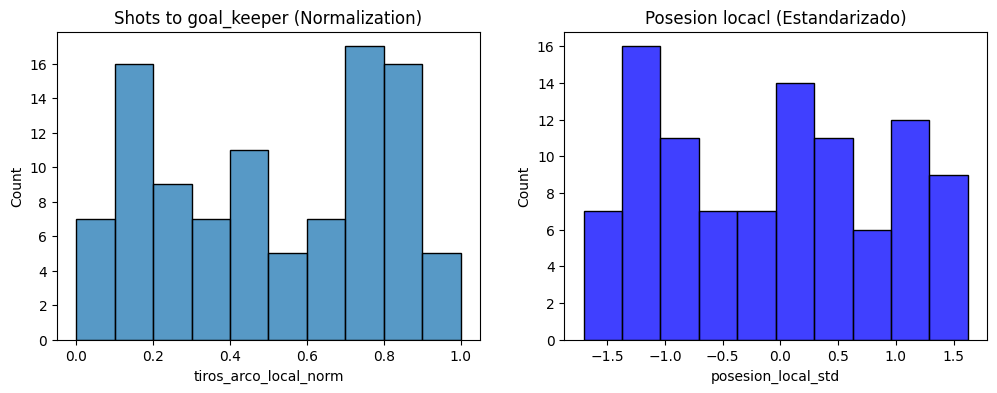

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(1,2,figsize=(12,4))
#Visulizacion shots to keep_goal - Normalization
sns.histplot(df_game['tiros_arco_local_norm'],ax=ax[0],bins=10)
ax[0].set_title("Shots to goal_keeper (Normalization)")
sns.histplot(df_game['posesion_local_std'],bins=10,ax=ax[1],color='b')
ax[1].set_title("Posesion locacl (Estandarizado)")
plt.show()